In [2]:
import numpy as np
import matplotlib.pyplot as plt
from models import topaz

In [4]:
path = '/cluster/work/users/yingyue/data/TP4'
mask = topaz.get_mask(path+'/depth_TP4b0.12_01.a')

filename = path+'/TP4restart2007_002_00_mem001.a'
u = topaz.read_data(filename, 'u', 1, mask)
v = topaz.read_data(filename, 'v', 1, mask)
current = np.array([u, v])
ssh  = topaz.read_data(filename, 'ssh', 0, mask)

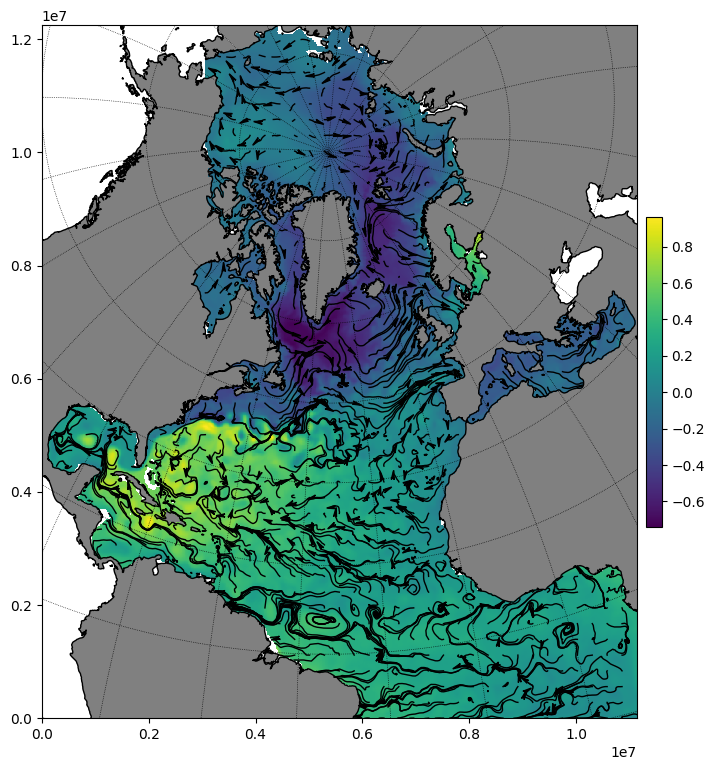

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

topaz.grid.plot_field(ax, ssh)
topaz.grid.plot_vectors(ax, current, V=0.1, num_steps=50)
topaz.grid.plot_land(ax, color='gray', dlat=15, dlon=15)

In [4]:
import pyproj
from grid import Grid, Converter, regular_grid
proj = pyproj.Proj('+proj=stere +lon_0=0 +lat_0=90')
x, y = regular_grid(-3.5e6, 2.5e6, -3.5e6, 2.5e6, dx=1e4)
grid = Grid(proj, x, y)
conv = Converter(topaz.grid, grid)

In [5]:
current_ = conv.convert(current, is_vector=True)
ssh_ = conv.convert(ssh)

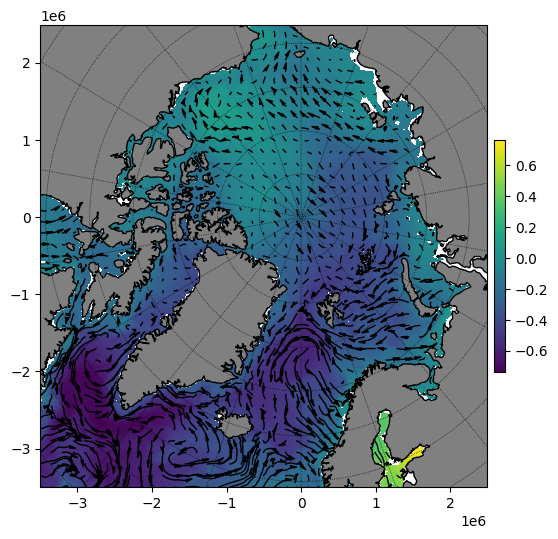

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
grid.plot_field(ax, ssh_)
grid.plot_vectors(ax, current_)
grid.plot_land(ax, color='gray')